<a href="https://colab.research.google.com/github/suhkisoo/course-v3/blob/master/MidTermPart2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# You need to mount your google drive  to the /content/gdrive folder of your virtual computer
# located in the colab server

from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [3]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Question 1: (1.1) Please download 3 categories of animal images from google. Download about 100 images for each category. 

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

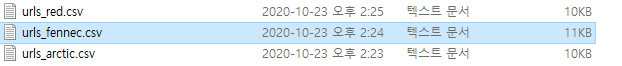



### Download into file

Question 1 (1.2) Move the downloaded files to your google dirve and make the names of the files in the form of *.csv.

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>+Shift</kbd><kbd>+j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

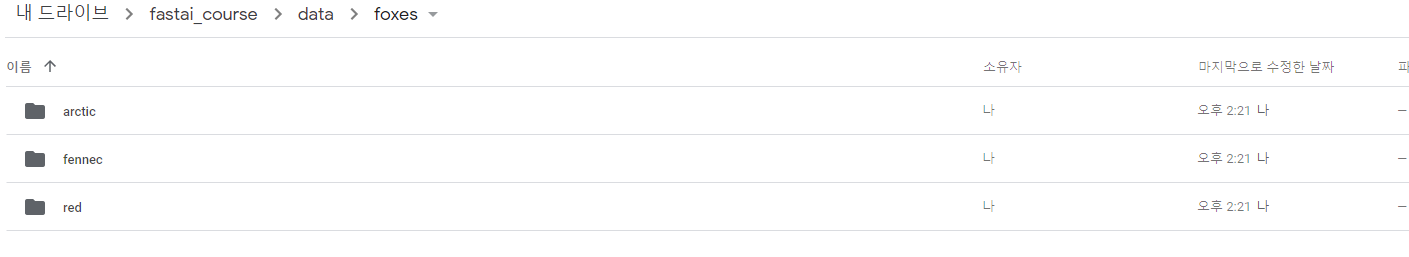

### upload urls file into /content folder

You will need to run this cell once per each category. The following is an illustration.

In [13]:
path = Path('gdrive/My Drive/fastai_course/data/foxes')


## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.  The following is an illustration.

In [5]:
classes = ['arctic','fennec','red']

In [ ]:
# For example, Do this when download "urls_black.csv' file:
# Question 2: Explain what happens when you execute download_images() statement. - It download images of csv file links.


In [8]:
folder = 'arctic'
dest = path/folder
file = 'urls_arctic.csv'
download_images(dest/file, dest, max_pics=100)

In [12]:
folder = 'fennec'
dest = path/folder
file = 'urls_fennec.csv'
download_images(dest/file, dest, max_pics=100)

In [14]:
folder = 'red'
dest = path/folder
file = 'urls_red.csv'
download_images(dest/file, dest, max_pics=100)

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

arctic


fennec


red


## View data

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
                                                                    
# Question 3: Explain how the categories of the images are extracted when you execute the above statement. - Train and validation datas are randomly placed in the databunch at a rate of 0.2 at size 224 being normalized.


Good! Let's take a look at some of our pictures then.

## Train model

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# Question 4: 4.1) cnn_learner() has input paramters other than the shown above.
# One of them is pretrained, which is True by default when you do not specify it. 
# What happens when you specify pretrained=True as in 
# learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False) 
# - If pretrained=true, learn.freeze() is executed. This is the presence or absence of already learned content, so if it is true, the existing value will be freezed.  

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.984298,0.887033,0.300000,00:04
1,1.141510,0.171095,0.033333,00:03
2,0.775248,0.188500,0.016667,00:03
3,0.610726,0.201378,0.016667,00:03


In [22]:
interp = ClassificationInterpretation.from_learner(learn)

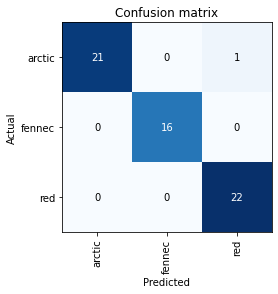

In [23]:
interp.plot_confusion_matrix()
# Question 5: What does your confusion matrix tell you about the prediction capability of your neural network?
# Explain in a conscise manner but do not omit important points.
# - It shows the performance of the neural network by comparing prediction and actual at the same time. In this case, except for predicting arctic in red, all values ​​are on the diagonal, so all except 1 error were predicted correctly.

In [ ]:
#Question 6: use interp.plot_top_losses() to find out the prediction capability of your neural network?
# Explain in a conscise manner but do not omit important points.
# - Prediction is the predicted value with the neural network, and actual is the category of actual data. 
# - And the loss is calculated as the difference between the actual value and the predicted value, and the probability is the probability of the actual value calculated by the neural network.
# - Here, taking the first data as an example, the figure is slightly problematic, but the actual value arctic is predicted to be red, the loss is 10.6, and the probability of arctic is predicted as 0.00.

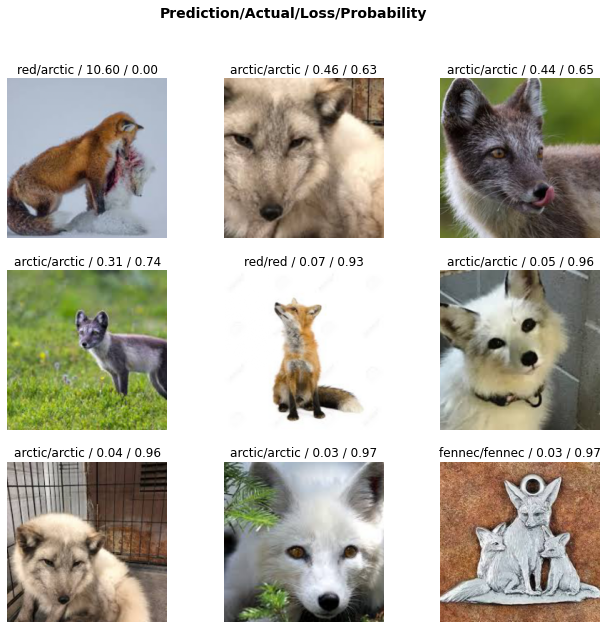

In [27]:
interp.plot_top_losses(9, largest=True, figsize=(11,10))